In [1]:
from rxitect.generator.models.smiles_transformer import SmilesTransformer
from rxitect.generator.models.components.transformer_encoder import TransformerEncoder
from rxitect.generator.datamodules.chembl_datamodule import ChemblSmilesDataModule
from rxitect.structs.vocabulary import SmilesVocabulary
from rxitect.generator.datamodules.components.molecule_dataset import MoleculeDataset
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
import numpy as np
import dask.dataframe as dd

/home/julius/miniconda3/envs/rxt-dev/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
chembl_path = "../data/processed/smiles_chembl_corpus.tsv"
vocabulary = SmilesVocabulary(vocabulary_file_path="../data/processed/smiles_voc.txt")
dm = ChemblSmilesDataModule(chembl_path, vocabulary)

In [3]:
net = TransformerEncoder(len(vocabulary.ix2tk))

In [4]:
model = SmilesTransformer(net)

In [5]:
data = dd.read_table("../data/processed/smiles_chembl_corpus.tsv").head(n=1000)
ds = MoleculeDataset(data=data, vocabulary=vocabulary)
dl = DataLoader(ds, batch_size=256, pin_memory=True)
test_batch = next(iter(dl))
test_batch

/home/julius/miniconda3/envs/rxt-dev/lib/python3.8/site-packages/torch/cuda/__init__.py:82: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755903507/work/c10/cuda/CUDAFunctions.cpp:112.)
  return torch._C._cuda_getDeviceCount() > 0


tensor([[19, 19, 24,  ...,  0,  0,  0],
        [23, 17, 19,  ...,  0,  0,  0],
        [19, 19, 19,  ...,  0,  0,  0],
        ...,
        [19, 19,  4,  ...,  0,  0,  0],
        [19, 81,  8,  ...,  0,  0,  0],
        [19, 19, 23,  ...,  0,  0,  0]])

In [6]:
out = model.forward(test_batch)
out.size()

torch.Size([256, 100, 85])

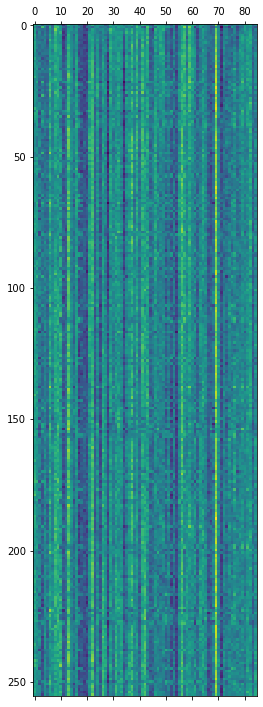

In [7]:
plt.matshow(out[:,0,:].detach())

In [17]:
out[0, :, :]

tensor([[ 0.7349,  0.1134,  0.4728,  ...,  0.6370, -0.2275,  0.1784],
        [ 0.4752, -0.0903,  0.0591,  ...,  0.5090, -0.5320,  0.2929],
        [ 0.1511,  0.1948, -0.7280,  ...,  1.4268,  0.1807, -0.6337],
        ...,
        [ 0.6195,  0.6457,  0.4235,  ...,  0.6779, -0.9499, -0.6862],
        [ 0.1257,  0.0710,  0.5295,  ...,  1.1794, -0.9434, -0.0841],
        [ 0.4737,  0.3092,  0.7138,  ...,  0.7965, -1.0483, -0.6782]],
       grad_fn=<SliceBackward0>)